# Geostats Homework #3 -- Zoe Flanzer

In [85]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# downloading data
Data = np.loadtxt('/content/drive/MyDrive/GEO Stats/HW3/icevelocity.txt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# defining columns of icevelocity.txt
z = Data[:,0] # depth (m)
v = Data[:,1] # observed ice velocity (m/yr)

## Question #1

linear fit parameters: slope=75.49


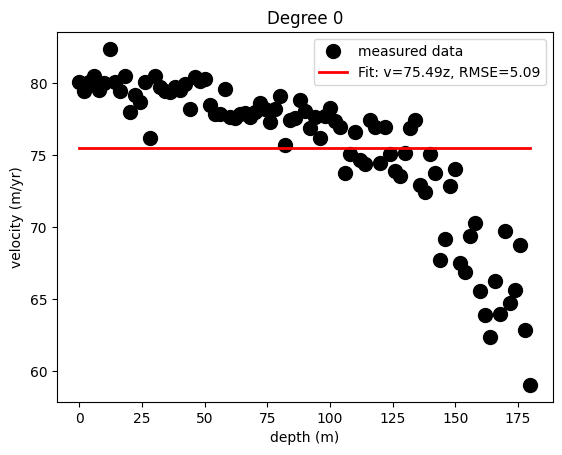

linear fit parameters: slope=-0.08, intercept=82.88


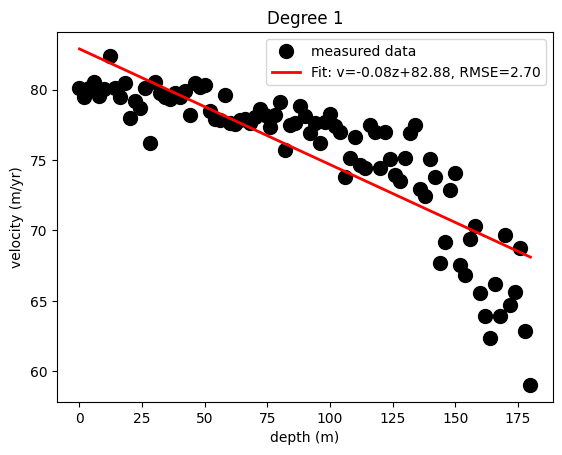

linear fit parameters: slope=0.06, intercept=78.72


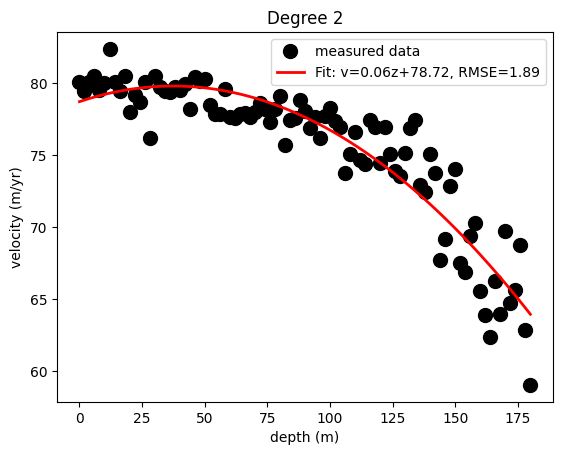

linear fit parameters: slope=-0.07, intercept=80.59


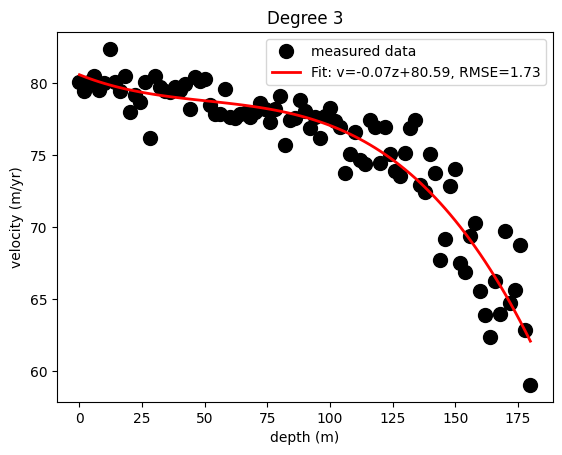

linear fit parameters: slope=-0.05, intercept=80.41


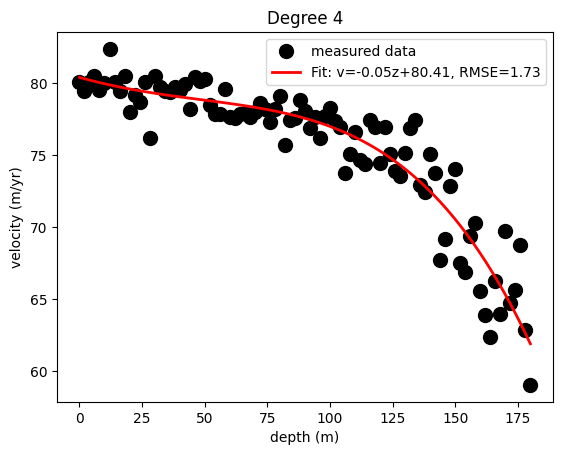

In [116]:
# calculating and plotting degree 0 data
plt.figure(1)
plt.clf()
plt.plot(z,v,'ko',linewidth=2,markersize=10,label=f'measured data')
plt.xlabel('depth (m)')
plt.ylabel('velocity (m/yr)')
P=np.polyfit(z,v,0) # degree 0 polynomial
print(f"linear fit parameters: slope={P[0]:.2f}")
Vm = np.polyval(P,z)
RMSE = np.sqrt(np.mean((Vm - v)**2))
plt.plot(z, Vm, 'r-', label=f'Fit: v={P[0]:0.2f}z, RMSE={RMSE:.2f}',linewidth=2)
plt.title('Degree 0')
plt.legend()
plt.show()

# calculating and plotting degree 1 data
plt.figure(2)
plt.clf()
plt.plot(z,v,'ko',linewidth=2,markersize=10,label=f'measured data')
plt.xlabel('depth (m)')
plt.ylabel('velocity (m/yr)')
P=np.polyfit(z,v,1) # degree 1 polynomial
print(f"linear fit parameters: slope={P[0]:.2f}, intercept={P[1]:.2f}")
Vm = np.polyval(P,z)
RMSE = np.sqrt(np.mean((Vm - v)**2))
plt.plot(z, Vm, 'r-', label=f'Fit: v={P[0]:0.2f}z+{P[1]:.2f}, RMSE={RMSE:.2f}', linewidth=2)
plt.title('Degree 1')
plt.legend()
plt.show()

# calculating and plotting degree 2 data
plt.figure(3)
plt.clf()
plt.plot(z,v,'ko',linewidth=2,markersize=10,label=f'measured data')
plt.xlabel('depth (m)')
plt.ylabel('velocity (m/yr)')
P=np.polyfit(z,v,2) # degree 2 polynomial
print(f"linear fit parameters: slope={P[1]:.2f}, intercept={P[2]:.2f}")
Vm = np.polyval(P,z)
RMSE = np.sqrt(np.mean((Vm - v)**2))
plt.plot(z, Vm, 'r-', label=f'Fit: v={P[1]:0.2f}z+{P[2]:.2f}, RMSE={RMSE:.2f}', linewidth=2)
plt.title('Degree 2')
plt.legend()
plt.show()

# calculating and plotting degree 3 data
plt.figure(4)
plt.clf()
plt.plot(z,v,'ko',linewidth=2,markersize=10,label=f'measured data')
plt.xlabel('depth (m)')
plt.ylabel('velocity (m/yr)')
P=np.polyfit(z,v,3) # degree 3 polynomial
print(f"linear fit parameters: slope={P[2]:.2f}, intercept={P[3]:.2f}")
Vm = np.polyval(P,z)
RMSE = np.sqrt(np.mean((Vm - v)**2))
plt.plot(z, Vm, 'r-', label=f'Fit: v={P[2]:0.2f}z+{P[3]:.2f}, RMSE={RMSE:.2f}', linewidth=2)
plt.title('Degree 3')
plt.legend()
plt.show()

# calculating and plotting degree 4 data
plt.figure(5)
plt.clf()
plt.plot(z,v,'ko',linewidth=2,markersize=10,label=f'measured data')
plt.xlabel('depth (m)')
plt.ylabel('velocity (m/yr)')
P=np.polyfit(z,v,4) # degree 4 polynomial
print(f"linear fit parameters: slope={P[3]:.2f}, intercept={P[4]:.2f}")
Vm = np.polyval(P,z)
RMSE = np.sqrt(np.mean((Vm - v)**2))
plt.plot(z, Vm, 'r-', label=f'Fit: v={P[3]:0.2f}z+{P[4]:.2f}, RMSE={RMSE:.2f}', linewidth=2)
plt.title('Degree 4')
plt.legend()
plt.show()

## Parameter estimation with Monte-Carlo (Q2)

In [117]:
# number of simulations
simN = 1000

# degrees to fit
degrees = [0,1,2,3,4]

# storing
params = np.zeros((simN,len(degrees)))
rmses = np.zeros((simN,len(degrees)))

# monte carlo simulation
for i in range(simN):
  indices = np.random.choice(len(z), size=int(0.9*len(z)),replace=False) # randomly sampling 90% of data
  z_sample = z[indices]
  v_sample = v[indices]

  for d, degree in enumerate(degrees):
    P = np.polyfit(z_sample,v_sample,degree)
    Vm = np.polyval(P,z)
    RMSE = np.sqrt(np.mean((Vm - v)**2))

    params[d, :len(P)] = P
    rmses[i,d] = RMSE

for d in degrees:
  params[d] = np.array(params[d])
  rmses[d] = np.array(rmses[d])

params_means = np.mean(params, axis=0)
params_stds = np.std(params, axis=0)
rmses_means = np.mean(rmses, axis=0)
rmses_stds = np.std(rmses, axis=0)

# creating data frame
values = {
          'Mean Parameters': params_means,
          'Parameter Standard Deviations': params_stds,
          'RMSE Means': rmses_means,
          'RMSE Standard Deviations': rmses_stds
}

DT = pd.DataFrame(values)
print(DT)

   Mean Parameters  Parameter Standard Deviations  RMSE Means  \
0         0.075321                       2.383280    5.089100   
1         0.082897                       2.618218    2.700392   
2         0.078600                       2.486450    1.894341   
3         0.080493                       2.545497    1.738694   
4         0.080312                       2.538421    1.739555   

   RMSE Standard Deviations  
0                  0.004896  
1                  0.005728  
2                  0.005280  
3                  0.007996  
4                  0.010367  


## Cross Validation (Q3)

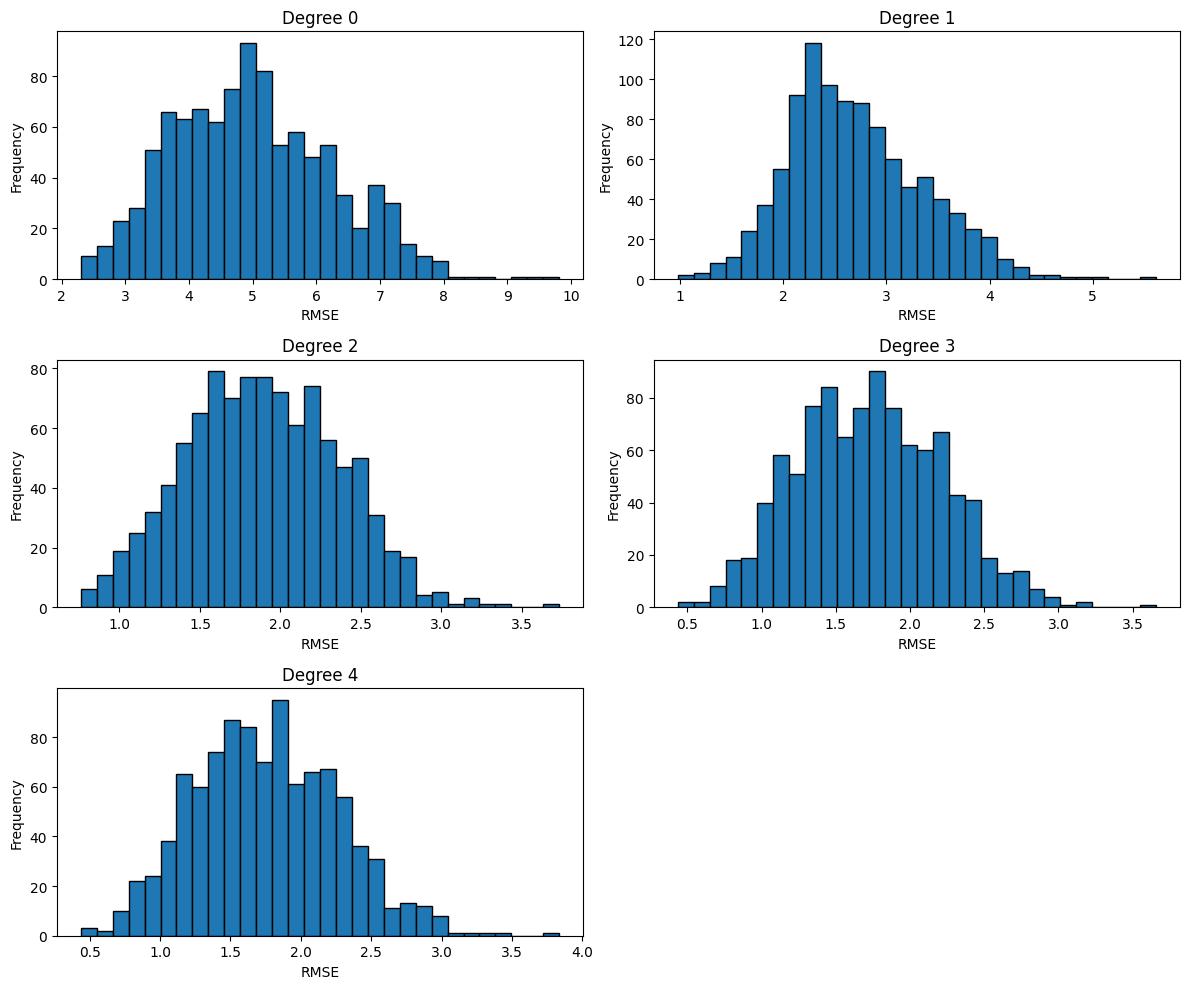

In [118]:
# storing RMSE values
cvRMSE = np.zeros((simN,len(degrees)))

# cross validating using for loop
for i in range(simN):
  # splitting data into training and testing datasets
  indices = np.arange(len(z))
  np.random.shuffle(indices)
  training = indices[:int(0.9*len(z))]
  testing = indices[int(0.9*len(z)):]

  z_train = z[training]
  v_train = v[training]
  z_test = z[testing]
  v_test = v[testing]

  for d in degrees:
    # fitting and training the data
    P = np.polyfit(z_train,v_train,d)
    Vm = np.polyval(P,z_test)
    RMSE = np.sqrt(np.mean((Vm - v_test)**2)) # finding RMSE with test data

    cvRMSE[i,d] = RMSE # storing RMSE

# seperating RMSE's from different degrees into different variables
rmse0 = cvRMSE[:, 0]
rmse1 = cvRMSE[:, 1]
rmse2 = cvRMSE[:, 2]
rmse3 = cvRMSE[:, 3]
rmse4 = cvRMSE[:, 4]

# plotting
plt.figure(figsize=(12, 10))

# degree 0
plt.subplot(3,2,1)
plt.hist(rmse0, bins=30, edgecolor='black')
plt.title('Degree 0')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

# degree 1
plt.subplot(3,2,2)
plt.hist(rmse1, bins=30, edgecolor='black')
plt.title('Degree 1')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

# degree 2
plt.subplot(3,2,3)
plt.hist(rmse2, bins=30, edgecolor='black')
plt.title('Degree 2')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

# degree 3
plt.subplot(3,2,4)
plt.hist(rmse3, bins=30, edgecolor='black')
plt.title('Degree 3')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

# degree 4
plt.subplot(3,2,5)
plt.hist(rmse4, bins=30, edgecolor='black')
plt.title('Degree 4')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Moving Window Average (Q4)

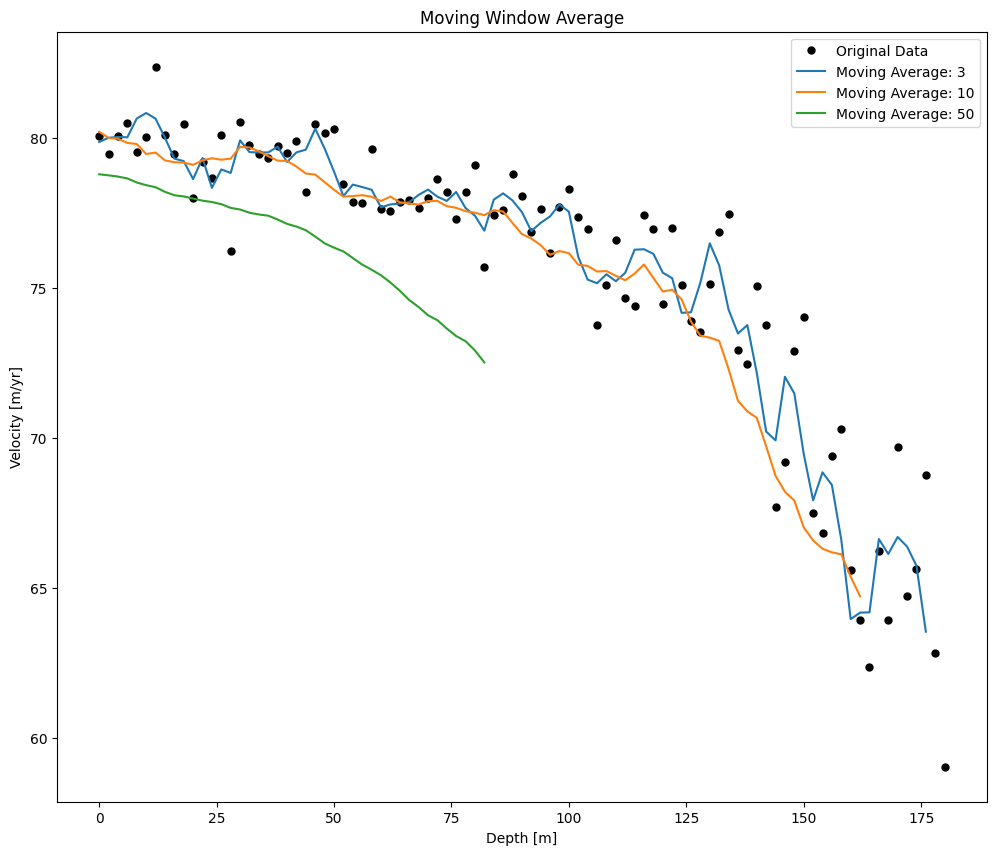

In [119]:
# making moving average function
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# setting window sizes
window_sizes = [3, 10, 50]

# plotting data
plt.figure(figsize=(12, 10))
plt.plot(z, v, 'ko', label='Original Data', markersize=5)

# plotting moving average
for window_size in window_sizes:
    maV = moving_average(v, window_size)
    maZ = z[:len(maV)]
    plt.plot(maZ, maV, label=f'Moving Average: {window_size}')

plt.xlabel('Depth [m]')
plt.ylabel('Velocity [m/yr]')
plt.title('Moving Window Average')
plt.legend()
plt.show()



## Weighted Moving Average (Q5)

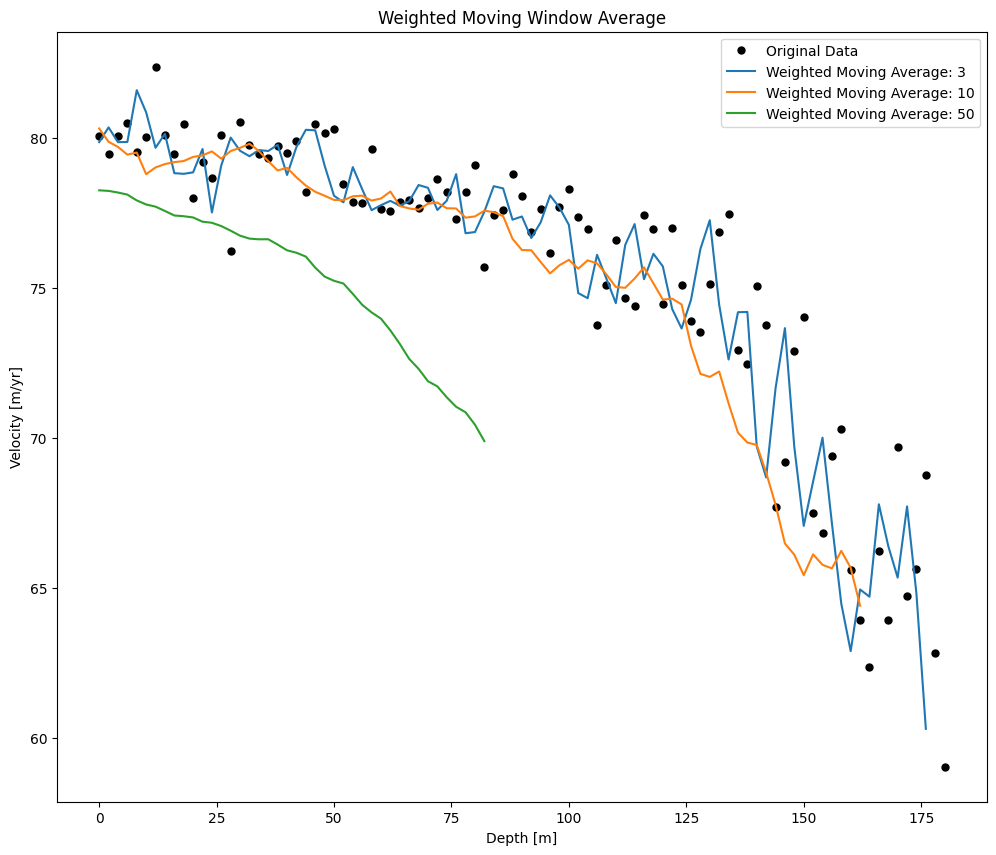

In [120]:
# making weighted moving average function
def weighted_MA(data, window_size):
    weights = np.linspace(1, 0, window_size)
    weights /= np.sum(weights)
    return np.convolve(data, weights, mode='valid')

# plotting original data
plt.figure(figsize=(12, 10))
plt.plot(z, v, 'ko', label='Original Data', markersize=5)

# plotting weighted moving average
for window_size in window_sizes:
    wmaV = weighted_MA(v, window_size)
    wmaZ = z[:len(wmaV)]
    plt.plot(wmaZ, wmaV, label=f'Weighted Moving Average: {window_size}')

plt.xlabel('Depth [m]')
plt.ylabel('Velocity [m/yr]')
plt.title('Weighted Moving Window Average')
plt.legend()
plt.show()

## Optimum Window Size (Q6)

In [121]:
# storing RMSE values for each window size
rmse = np.array([])

# finding RMSE's for different window sizes
for window_size in window_sizes:
    maV = moving_average(v, window_size)
    maZ = z[:len(maV)]
    rmses = np.sqrt(np.mean((maV - v[:len(maV)])**2))
    rmse = np.append(rmse, rmses)

# finding window size with smallest RMSE
optimal_window_size = window_sizes[np.argmin(rmse)]

# printing optimal window size
print(f'The optimal window size is {optimal_window_size} meter')

The optimal window size is 3 meter


## Brute Force Method (Q7 & Q8)

In [122]:
# defining theoretical ice flow model
def ice_tm(z, sv, A, n):
  rho = 917 # kg/m3
  g = 9.8 # m/s2
  theta = np.deg2rad(10) # surface slope but converted to radians
  return sv - A * (rho*g*np.sin(theta))**n *z**(n+1)

# defining surface velocity
sv = v[0]

# defining range of A and n
Av = np.linspace(0.1e-18, 10e-18, 100) # range for A
nv = np.linspace(-1, 4, 50) # range for n

# initializing RMSEs
rmse = np.zeros((len(Av), len(nv)))

# performing brute force/grid search
for i, A in enumerate(Av):
  for j, n in enumerate(nv):
    vmodel = ice_tm(z, sv, A, n)
    rmse[i, j] = np.sqrt(np.mean((vmodel - v)**2))

min_rmse = np.unravel_index(np.argmin(rmse), rmse.shape)
opt_A = Av[min_rmse[0]]
opt_n = nv[min_rmse[1]]

print(f'The optimal parameters are A={opt_A} and n={opt_n}') # printing answer to Q7

The optimal parameters are A=6.200000000000001e-18 and n=2.979591836734694


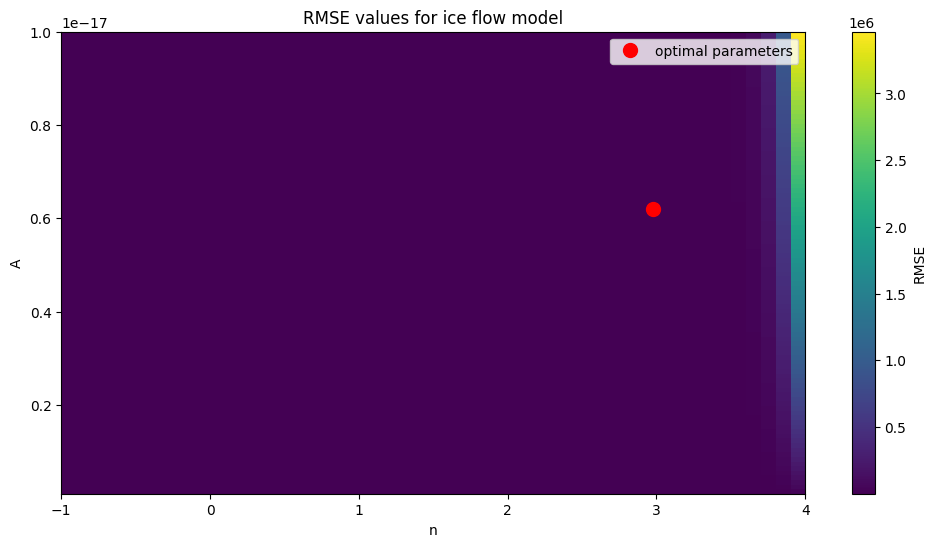

In [123]:
# plotting (Q8)
plt.figure(figsize=(12,6))
plt.clf()
plt.imshow(rmse, extent=[nv.min(), nv.max(), Av.min(), Av.max()], aspect='auto',origin='lower',cmap='viridis')
plt.xlabel('n')
plt.ylabel('A')
plt.colorbar(label='RMSE')
plt.title('RMSE values for ice flow model')

plt.plot(opt_n, opt_A, 'ro', markersize=10, label=f'optimal parameters')
plt.legend()

## Gradient Search Method (Q9 & Q10)

In [126]:
from scipy.optimize import minimize

# creating gradient search function
def objective_function(params, z, v, sv):
    A, n = params
    v_model = ice_tm(z, sv, A, n)
    rmse = np.sqrt(np.mean((v_model - v) ** 2))
    return rmse

# defining initial guess
initial_guess = [1e-10, 2]

# calculating gradient descent
result = minimize(objective_function, initial_guess, args=(z, v, sv), bounds=[(1e-20, 1e-10), (1, 4)])

opt_A, opt_n = result.x

# checking values
print(f"Optimum A: {opt_A}")
print(f"Optimum n: {opt_n}")

Optimum A: 1e-20
Optimum n: 1.9994270133096679


Text(0.5, 1.0, 'RMSE Distribution')

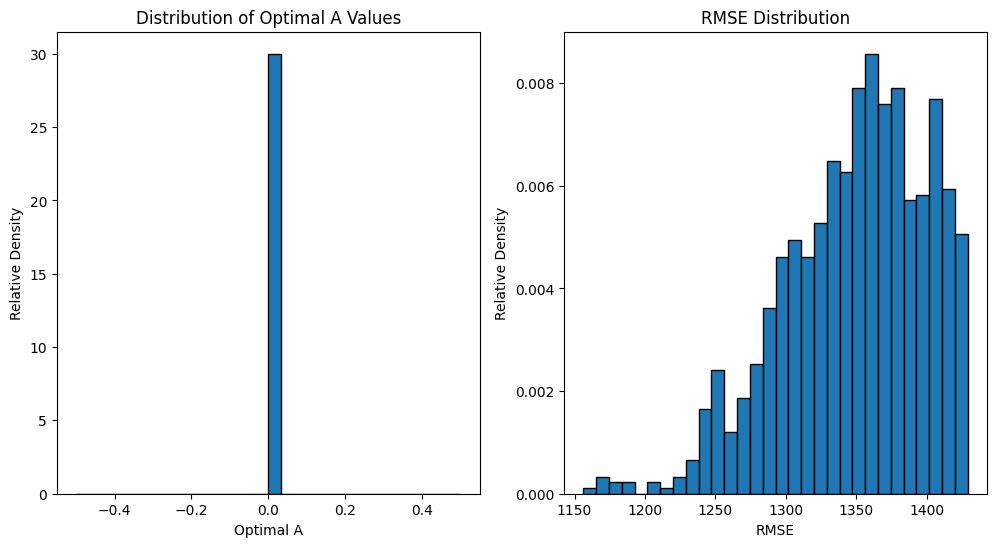

In [132]:
# defining function with fixed n value for problem 10
def objective_function2(A, z, v, sv, n=3):
    v_model = ice_tm(z, sv, A, n)
    rmse = np.sqrt(np.mean((v_model - v) ** 2))
    return rmse

# defining number of times
ni = 1000

# creating arrays
opt_Av = []
rmse_v = []

# looping through 90% of data defined number of times
for _ in range (ni):
  indices = np.random.choice(len(z), size=int(0.9*len(z)),replace=False) # randomly sampling 90% of data
  z_sample = z[indices]
  v_sample = v[indices]

  # optimize
  initial_guess = [1e-15]
  result = minimize(objective_function2, initial_guess, args=(z_sample, v_sample, sv))
  opt_A = result.x[0]
  rmse = result.fun

  opt_Av.append(opt_A)
  rmse_v.append(rmse)

opt_Av = np.array(opt_Av)
rmse_v = np.array(rmse_v)

# plotting
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(opt_Av, bins=30, density=True, edgecolor='black')
plt.xlabel('Optimal A')
plt.ylabel('Relative Density')
plt.title('Distribution of Optimal A Values')

plt.subplot(1,2,2)
plt.hist(rmse_v, bins=30, density=True, edgecolor='black')
plt.xlabel('RMSE')
plt.ylabel('Relative Density')
plt.title('RMSE Distribution')

## Q 11

In [129]:
# finding mean and standard deviation of A
mean_A = np.mean(opt_Av)
std_A = np.std(opt_Av)

# checking values
print(f"Mean of Optimal A: {mean_A}")
print(f"Standard Deviation of Optimal A: {std_A}")


Mean of Optimal A: 1.0000000000000003e-15
Standard Deviation of Optimal A: 1.9721522630525295e-31


TypeError: Invalid shape () for image data

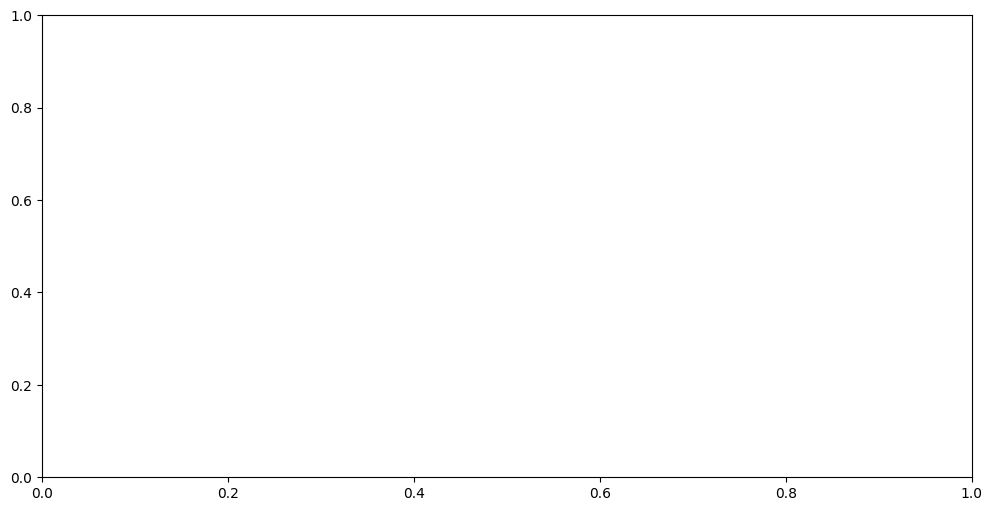

In [130]:
plt.figure(figsize=(12, 6))
plt.imshow(rmse, extent=[nv.min(), nv.max(), np.log10(Av.min()), np.log10(Av.max())], aspect='auto', origin='lower', cmap='viridis')
# rmse values were changed and I can't identify how to fix it
plt.xlabel('n')
plt.ylabel('log(A)')
plt.colorbar(label='RMSE')
plt.title('RMSE values for theoretical ice flow model')

# Plot the mean optimal A with vertical error bars
plt.errorbar(3, np.log10(mean_A), yerr=[np.log10(mean_A + std_A) - np.log10(mean_A), np.log10(mean_A) - np.log10(mean_A - std_A)], fmt='ro', markersize=10, label='Mean Optimal A with StdDev')
plt.legend()
plt.show()

## Question 12

In [144]:
# finding means and standard deviations from monte carlo
params_means = np.mean(params, axis=0)
params_stds = np.std(params, axis=0)
rmses_means = np.mean(rmses)
rmses_stds = np.std(rmses)

# simulating values
ns = 1000 # number of simulations
simulated_params = np.random.normal(params_means, params_stds, size=(ns, len(degrees)))
simulated_rmses = np.random.normal(rmses_means, rmses_stds, size=ns)

## Question 13

In [146]:
# importing ks_2samp
from scipy.stats import ks_2samp

# finding mean and standard deviation of rmses
mean_rmse = np.mean(rmse_v)
std_rmse = np.std(rmse_v)

# Perform KS tests
ks_stat_A, p_value_A = ks_2samp(opt_Av, simulated_A)
ks_stat_rmse, p_value_rmse = ks_2samp(rmse_v, simulated_rmses)

# printing values
print(f"KS Test for A: statistic={ks_stat_A}, p-value={p_value_A}")
print(f"KS Test for RMSE: statistic={ks_stat_rmse}, p-value={p_value_rmse}")


KS Test for A: statistic=0.723, p-value=5.958529888311548e-253
KS Test for RMSE: statistic=1.0, p-value=0.0
